# Installing Needed Tools

In [106]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Tools

In [107]:
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import matplotlib.pyplot as plt # for plotting
import cv2 # computer vision from extracting features from images
import seaborn as sns # enchancement of plotting 
import math # uses for log operations to prevent underflow when calculating very small %'s
sns.set_style("darkgrid")

## Dataset
Load the spreadsheet for feature extraction with computer vision.

In [108]:
spreadsheet_data = pd.read_csv("birds.csv") # load the dataset
spreadsheet_data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision & Features
The spreadsheet does not directly contains the features, rather the filepaths for the images. Before we can use Naive Bayes we need to use convert these images to usable data format in python.

In [109]:

# Get a reduced size image's array of the pixel data into a dataframe to easily relate it to it's 'label'
def load_resize_flatten_images(df, target_size=(28, 28)):    
    # convert data format to feature vectors
    images, labels = [],[]
    data = {'image':[],'label':[], 'class':[], 'data set':[]}
    for index, row in df.iterrows():
        # extractp pixel data from the image at the file path
        image = cv2.imread(row['filepaths'])
        # gray scale to reduce data size while retaining most data as colors well be stored as intenisity
        grayscaledImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # resize image to smaller dimensions make data more managable
        resizedImage = cv2.resize(grayscaledImage,target_size)
        # flatten into a 1D array
        imageArray = resizedImage.flatten()
        data['image'].append(imageArray)
        # use the filepath as an identifer to label the image data
        data['label'].append(row['filepaths'])
        data['class'].append(row['labels'])
        data['data set'].append(row['data set'])
    # encapsulate this data as a dataframe for easier handling
    return pd.DataFrame(data)
pixelData = load_resize_flatten_images(spreadsheet_data)
pixelData.head(10)


,image,label,class,data set
0,"[50, 54, 58, 62, 65, 69, 70, 73, 74, 76, 81, 1...",train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train
1,"[119, 114, 107, 109, 114, 124, 137, 140, 151, ...",train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train
2,"[144, 144, 144, 143, 143, 143, 144, 146, 147, ...",train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train
3,"[157, 157, 157, 157, 157, 157, 157, 157, 157, ...",train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train
4,"[143, 142, 146, 153, 160, 164, 168, 172, 172, ...",train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train
5,"[88, 89, 87, 87, 89, 86, 90, 90, 93, 99, 98, 1...",train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train
6,"[71, 72, 91, 89, 80, 79, 83, 86, 86, 106, 124,...",train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train
7,"[120, 118, 118, 121, 118, 117, 111, 109, 108, ...",train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train
8,"[110, 91, 61, 75, 68, 240, 189, 41, 113, 103, ...",train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train
9,"[217, 220, 218, 215, 218, 212, 213, 216, 215, ...",train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train


## Basic Exploratory Data Analysis (EDA)
A given pixels value is logically independent of another. Since the heat map in the example exists to prove inpendence it has been forgone.
Here's a histogram of all pxiels in the dataset.

Text(0.5, 1.0, 'Grayscale Pixel Values')

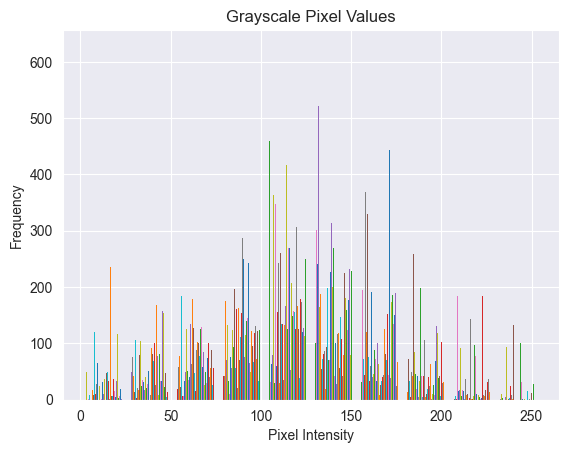

In [110]:
# Create a histogram with specified color
plt.hist(pixelData["image"], lw=0)

# Labeling x and y axes
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Title for the histogram
plt.title('Grayscale Pixel Values')

# EDA II, Data Distrubtion
Histrogram of all gray scale pixel data(like above) but broken down by class(bird species).

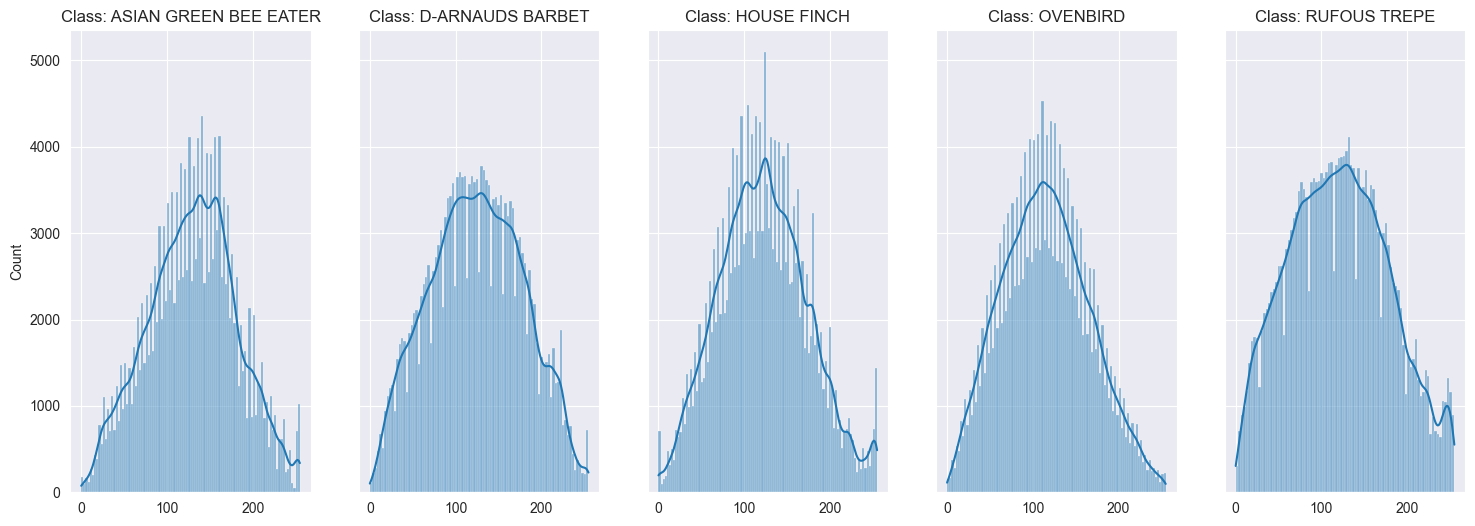

In [111]:
def EDA2(df):
    # show per label distrubtion
    classes = list(df['class'].unique())
    
    fig, axes = plt.subplots(1, len(classes), figsize=(18, 6), sharey=True)
    for i,clas in enumerate(classes):
        # get image data of the given class
        classData = df[df['class'] == clas]['image']
        # format the data for sns plotting
        flattened_data = np.concatenate(classData.values)
        # plot the data
        sns.histplot(flattened_data, ax=axes[i],  kde=True)
        axes[i].set_title(f'Class: {clas}')  # Set title for each subplot
EDA2(pixelData)


# EDA Results
It seems these are approx. normal distrubtion thus Guassian Naive Bayes is applicable.

## Calculate P(Y=y) for all possible y

In [112]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [157]:
def calculate_likelihood_gaussian(df, feat_index, feat_val, Y, label):
    
    df = df[df[Y]==label] # look at set that matches the class
    # featuresXI has every instance of the given feature(pixel) across the same class.
    featuresXI = df['image'].apply(lambda x: x[feat_index])
    mean, std = featuresXI.mean(), featuresXI.std() # get mean,std of all instances of the feature
    # feat_val is the current instance of the feature
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    # probabitilies are very small, so log is applied to prevent underflow
    # note, this will result in negative values, this is normal
    # this processed can by reversed an taking the natural exponent if need be
    # np.log = natural log
    p_x_given_y = np.log(p_x_given_y) # causes overflow
    # overflow prevention(because there isn't enough precision for what the calculation will cause)
    # p_x_given_y = round(p_x_given_y, 5) # doesn't resolve the overflow caused by taking the log
    #print(p_x_given_y)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [158]:
def naive_bayes_gaussian(df, X, Y):
    # get feature name from first column
    # calculate prior
    prior = calculate_prior(df, Y)
    Y_pred = []
    # loop over every data sample
    # X = list of numpy arrays which contain the grey scale pixel data
    # x = a given nump array of an image
    for x in X:
        # calculate likelihood
        # labels here is a list of bird species in the data set
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            #this range is wrong
            for xi,xval in enumerate(x):
                # xval is the specific feature instance(a specific pixel)
                # index xi, will allows to get mean,std of that specific pixel across all instances of that pixel within a class
                likelihood[j] *= calculate_likelihood_gaussian(df, xi, xval, Y, labels[j])
                

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            # post_prob[j] = np.log(likelihood[j]) * np.log(prior[j]) # likelhiood is already all 0's or inf by this point
            post_prob[j] = (likelihood[j]) * (prior[j])
        #print(post_prob)
        
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)
trainingPixelData = pixelData[pixelData['data set'] == 'train']
# x_test = list of numpy arrays which contain the grey scale pixel data
x_test = pixelData[pixelData['data set'] == 'test']['image'].tolist()
retcheck = naive_bayes_gaussian(trainingPixelData,x_test,Y='class')
print(retcheck)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16124\316179779.py:20: RuntimeWarning: overflow encountered in double_scalars
  likelihood[j] *= calculate_likelihood_gaussian(df, xi, xval, Y, labels[j])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Gaussian Result
Gaussian approach did not work. The probabitilies were too small causing things to zero out.

To counteract this I took the log of the probabilities. This resulted in overflow, even with incredibely small logs which then resulted in zeroing out of predictions. I further attempted rounding off the data to no avail. It was considered to attempt normalization, however the probabitilies are already
extremely small and the evidence is expensive to calculate. It was determined it would not resolve any issues.

# Gaussian Test
For the reasons mention above the guassian test code has not been modified to match code and has in fact been commmented out.

In [ ]:
''' 
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
'''

## Don't need to convert to discrete
Since the pixel intensities are whole numbers only, they are discrete.

In [166]:
def calculate_likelihood_categorical(df, feat_index, feat_val, Y, label):
    
    df = df[df[Y]==label]
    # featuresXI has every instance of the given feature(pixel) across the same class.
    featuresXI = df['image'].apply(lambda x: x[feat_index])
    count = 0
    for pixel in featuresXI:
        if pixel == feat_val: count += 1
    p_x_given_y = count / len(featuresXI)
    if(p_x_given_y) == 0: p_x_given_y == 0.001
    p_x_given_y = np.log(p_x_given_y)
    print(p_x_given_y)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [167]:
def naive_bayes_categorical(df, X, Y):

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    # X = list of numpy arrays which contain the grey scale pixel data
    # x = a given nump array of an image
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            # loop over the xval(pixel value) and pixel index(xi) 
            for xi,xval in enumerate(x):
                likelihood[j] *= calculate_likelihood_categorical(df, xi, xval, Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

trainingPixelData = pixelData[pixelData['data set'] == 'train']
# x_test = list of numpy arrays which contain the grey scale pixel data
x_test = pixelData[pixelData['data set'] == 'test']['image'].tolist()
retcheck = naive_bayes_categorical(trainingPixelData,x_test,Y='class')
print(retcheck)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16124\3800516449.py:11: RuntimeWarning: divide by zero encountered in log
  p_x_given_y = np.log(p_x_given_y)


-inf
-inf
-5.393627546352362
-5.393627546352362
-4.700480365792417
-inf
-inf
-inf
-4.700480365792417
-5.393627546352362
-inf
-inf
-inf
-5.393627546352362
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-4.700480365792417
-5.393627546352362
-inf
-5.393627546352362
-inf
-inf
-inf
-4.700480365792417
-inf
-inf
-5.393627546352362
-inf
-inf
-inf
-inf
-inf
-5.393627546352362
-inf
-4.700480365792417
-4.700480365792417
-inf
-5.393627546352362
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-5.393627546352362
-5.393627546352362
-inf
-4.700480365792417
-5.393627546352362
-5.393627546352362
-4.700480365792417
-inf
-inf
-inf
-inf
-4.700480365792417
-inf
-inf
-4.295015257684252
-inf
-4.700480365792417
-4.295015257684252
-5.393627546352362
-5.393627546352362
-5.393627546352362
-inf
-inf
-inf
-inf
-inf
-inf
-4.700480365792417
-inf
-4.700480365792417
-5.393627546352362
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-4.295015257684252
-inf
-4.700480365792417
-inf
-inf
-5.393627546352362
-inf
-5.393627546352362
-inf


# Categorical Results
Samiliar to gaussian, categorical naive bayes suffered form the samiliar problems with either encountering low or 0 value pixels espically problmeematic. Attempts to rememdy are the smame as in gaussian and like gaussian did not work.

## Test Categorical model

In [ ]:
'''from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)


X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
'''